# Data Visualization

In [1]:
# Read data from MSExcel spreadsheets
import pandas as pd

df1 = pd.read_excel("./datasets/Aracaju.xlsx")
df2 = pd.read_excel("./datasets/Fortaleza.xlsx")
df3 = pd.read_excel("./datasets/Natal.xlsx")
df4 = pd.read_excel("./datasets/Recife.xlsx")
df5 = pd.read_excel("./datasets/Salvador.xlsx")

df = pd.concat([df1,df2,df3,df4,df5])
df = df.rename(columns={"Cidade":"CITY", "Data": "DATE", "Vendas": "SALES", "LojaID": "STORE_ID", "Qtde": "QUANTITY"})
df["INCOME"] = df["SALES"].mul(df["QUANTITY"])
df.head()

,CITY,DATE,SALES,STORE_ID,QUANTITY,INCOME
0,Aracaju,2018-01-01,142.00,1520,1,142.00
1,Aracaju,2018-01-01,14.21,1522,6,85.26
2,Aracaju,2018-01-01,71.55,1520,1,71.55
3,Aracaju,2018-01-01,3.01,1521,7,21.07
4,Aracaju,2018-01-01,24.51,1522,8,196.08


In [3]:
# Get the number of sales for each store
df["STORE_ID"].value_counts(ascending=False)

1036    117
1035    112
1037    101
1034     67
983      65
982      44
1522     41
1520     39
980      36
981      31
1005     30
1002     30
852      29
1523     29
1004     28
854      28
853      26
1521     21
1003     20
Name: STORE_ID, dtype: int64

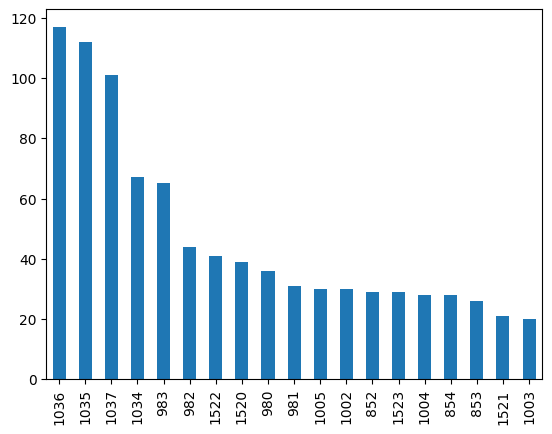

In [11]:
# Create a bar plot from a column value count
df.STORE_ID.value_counts(ascending=False).plot.bar();

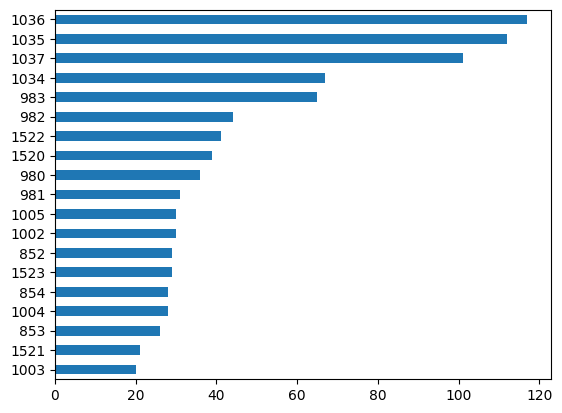

In [10]:
# Create a horizonta bar plot
df.STORE_ID.value_counts(ascending=True).plot.barh();

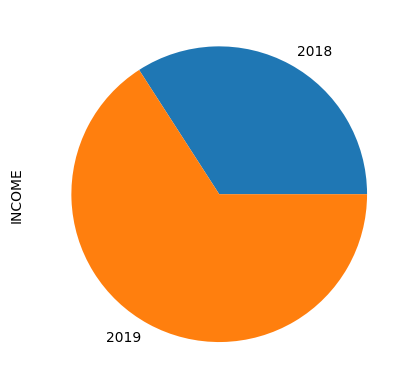

In [14]:
# Create a pie plot of income by year
df.groupby(df["DATE"].dt.year)["INCOME"].sum().plot.pie();

In [15]:
# Get sales by city
df.CITY.value_counts()

Natal        240
Salvador     240
Fortaleza    142
Recife       142
Aracaju      130
Name: CITY, dtype: int64

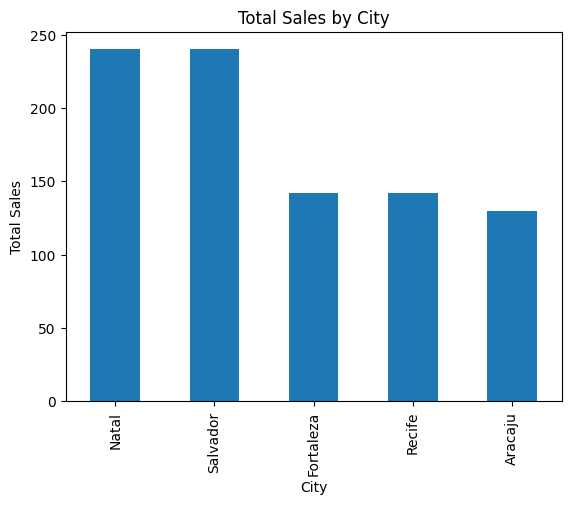

In [20]:
# Add a title in a plot
import matplotlib.pyplot as plt

df["CITY"].value_counts().plot.bar(title="Total Sales by City")
plt.xlabel("City")
plt.ylabel("Total Sales");

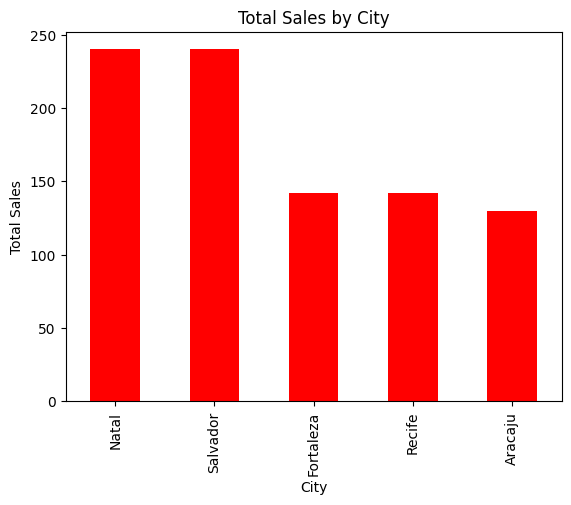

In [21]:
# Change color of the bars of a plot
df["CITY"].value_counts().plot.bar(title="Total Sales by City", color="red")
plt.xlabel("City")
plt.ylabel("Total Sales");

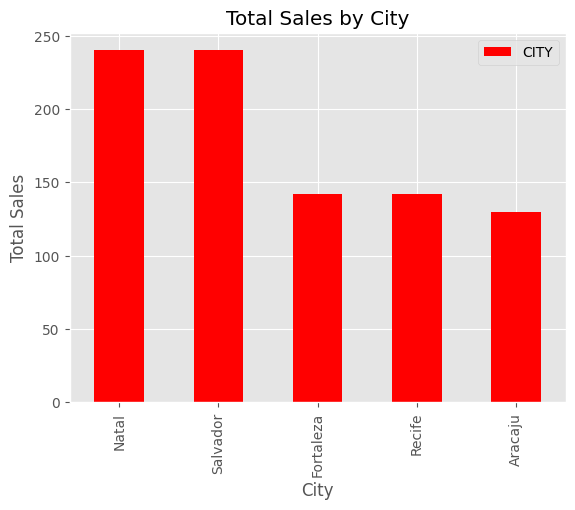

In [26]:
# Change the style of the plot
df["CITY"].value_counts().plot.bar(title="Total Sales by City", color="red")
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.style.use("ggplot")
plt.legend();

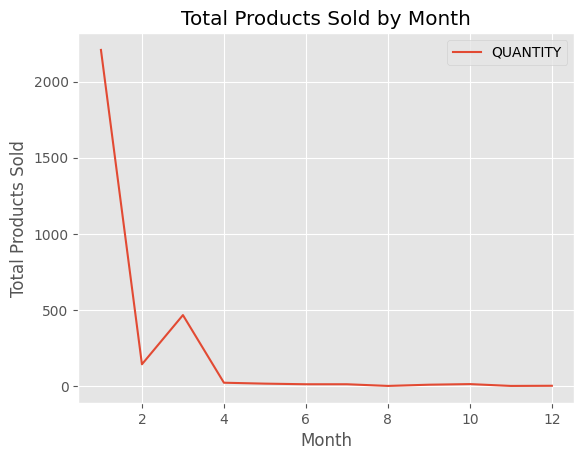

In [45]:
# Create a plot of sales my month
df.groupby(df.DATE.dt.month)["QUANTITY"].sum().plot(title="Total Products Sold by Month")
plt.xlabel("Month")
plt.ylabel("Total Products Sold")
plt.style.use("ggplot")
plt.legend();

In [29]:
# Filter sales by year
df_2019 = df[df.DATE.dt.year == 2019]
df_2019

,CITY,DATE,SALES,STORE_ID,QUANTITY,INCOME
7,Aracaju,2019-01-01,172.22,1522,6,1033.32
8,Aracaju,2019-01-01,12.16,1523,1,12.16
9,Aracaju,2019-01-01,149.36,1523,3,448.08
10,Aracaju,2019-01-01,42.34,1522,6,254.04
11,Aracaju,2019-01-01,161.53,1520,4,646.12
...,...,...,...,...,...,...
235,Salvador,2019-01-03,41.84,1034,1,41.84
236,Salvador,2019-01-03,126.29,1035,3,378.87
237,Salvador,2019-01-03,38.06,1036,3,114.18
238,Salvador,2019-01-03,139.64,1035,1,139.64


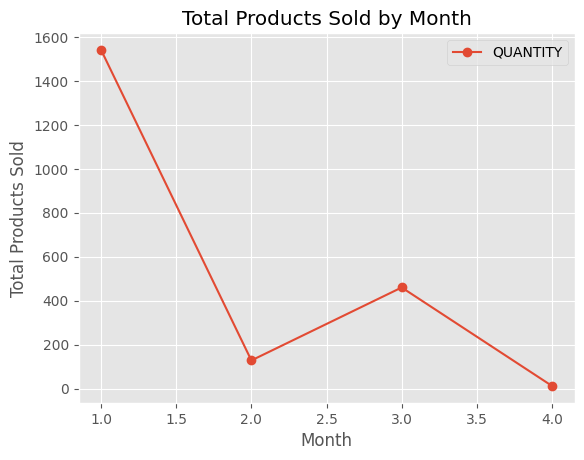

In [44]:
# Create a plot of sales my month in 2019
df_2019.groupby(df_2019.DATE.dt.month)["QUANTITY"].sum().plot(
    title="Total Products Sold by Month",
    marker="o"
)
plt.xlabel("Month")
plt.ylabel("Total Products Sold")
plt.style.use("ggplot")
plt.legend();

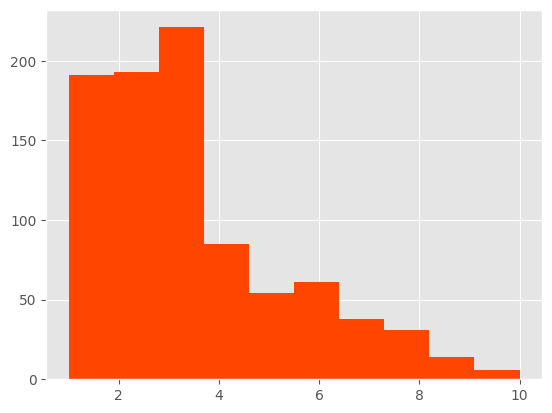

In [36]:
# create a histogram of a column
plt.hist(df.QUANTITY, color="orangered");

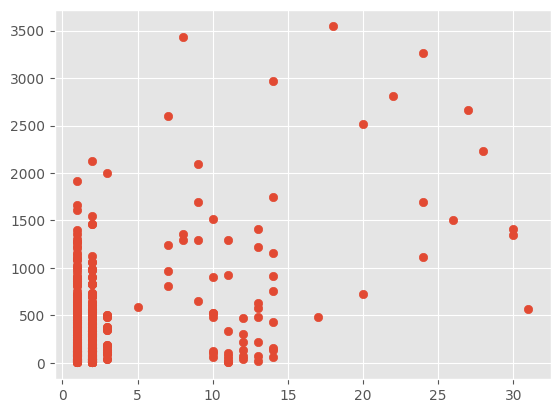

In [39]:
# Create a scater plot of two numeric columns
plt.scatter(x=df_2019.DATE.dt.day, y=df_2019.INCOME);

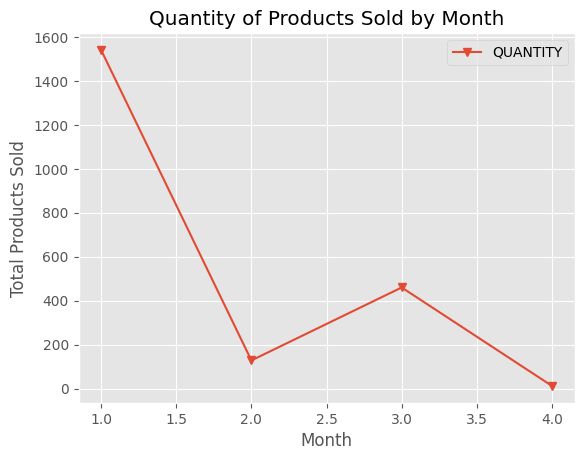

In [49]:
# Save a plot as png
df_2019.groupby(df_2019.DATE.dt.month)["QUANTITY"].sum().plot(marker="v")
plt.title("Quantity of Products Sold by Month")
plt.xlabel("Month")
plt.ylabel("Total Products Sold")
plt.legend()
plt.savefig("plot-sales-by-month.png")